## Ejercicio de segmentación de una imagen

In [8]:
# Se importan las librerias necesarias
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import cv2

In [5]:
# Se carga la imagen
image_path='/content/drive/MyDrive/ComputerVision/Ejercicios/Semana04/FrutasColoridas.webp'
image = Image.open(image_path)
image_np = np.array(image)

1. Implementar algoritmo de
segmentación con K-Means
usando SkLearns

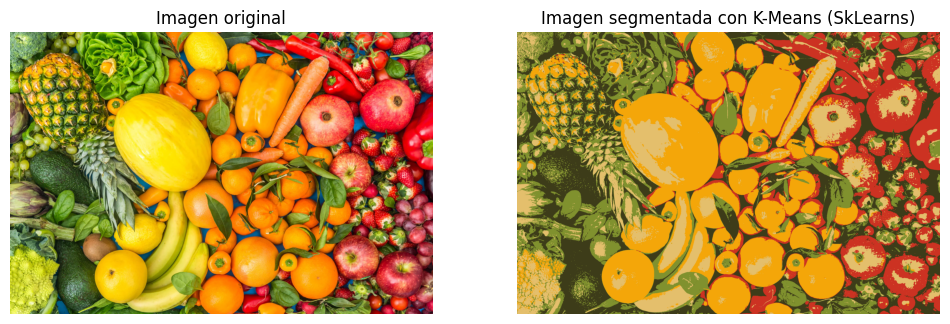

In [12]:
# Redimensionar la imagen a un array 2D de píxeles y 3 valores de color (RGB)
pixels = image_np.reshape(-1, 3)

# Aplicar K-means clustering para segmentar la imagen
kmeans = KMeans(n_clusters=5, random_state=42)  # 5 clusters
kmeans.fit(pixels)

# Reemplazar cada valor de píxel con su valor de centroide correspondiente
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image_np.shape)

# Convertir a uint8 para mostrar correctamente la imagen
segmented_img = segmented_img.astype(np.uint8)

# Mostrar imagen original y segmentada
plt.figure(figsize=(12, 6))

# Imagen original
plt.subplot(1, 2, 1)
plt.imshow(image_np)
plt.title('Imagen original')
plt.axis('off')

# Imagen segmentada con K-Means de SkLearns
plt.subplot(1, 2, 2)
plt.imshow(segmented_img)
plt.title('Imagen segmentada con K-Means (SkLearns)')
plt.axis('off')

plt.show()

2. Comparar resultados con
implementación con OpenCV
cv.kmeans()

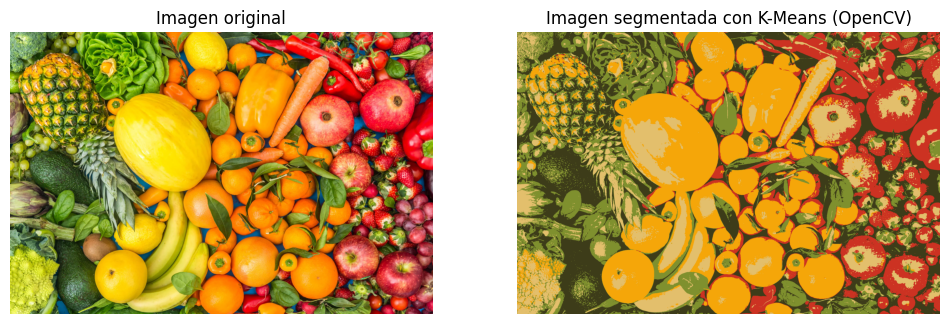

In [10]:
# Se convierte imagen a float32 porque así lo requiere OpenCV para kmeans
pixels_cv = np.float32(pixels)

# Definir criterios para el algoritmo (tipo de terminación, iteraciones máximas, precisión requerida)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Aplicar kmeans de OpenCV
k = 5  # Número de clusters
_, labels, centers = cv2.kmeans(pixels_cv, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert centers back to uint8 (0-255 range) and map labels to corresponding colors
centers = np.uint8(centers)
segmented_img_cv = centers[labels.flatten()]
segmented_img_cv = segmented_img_cv.reshape(image_np.shape)

# Mostrar imagen original y segmentada
plt.figure(figsize=(12, 6))

# Imagen original
plt.subplot(1, 2, 1)
plt.imshow(image_np)
plt.title('Imagen original')
plt.axis('off')

# Imagen segmentada con K-Means de OpenCV
plt.subplot(1, 2, 2)
plt.imshow(segmented_img_cv)
plt.title('Imagen segmentada con K-Means (OpenCV)')
plt.axis('off')

plt.show()

## Comparación visual de métodos de segmentación

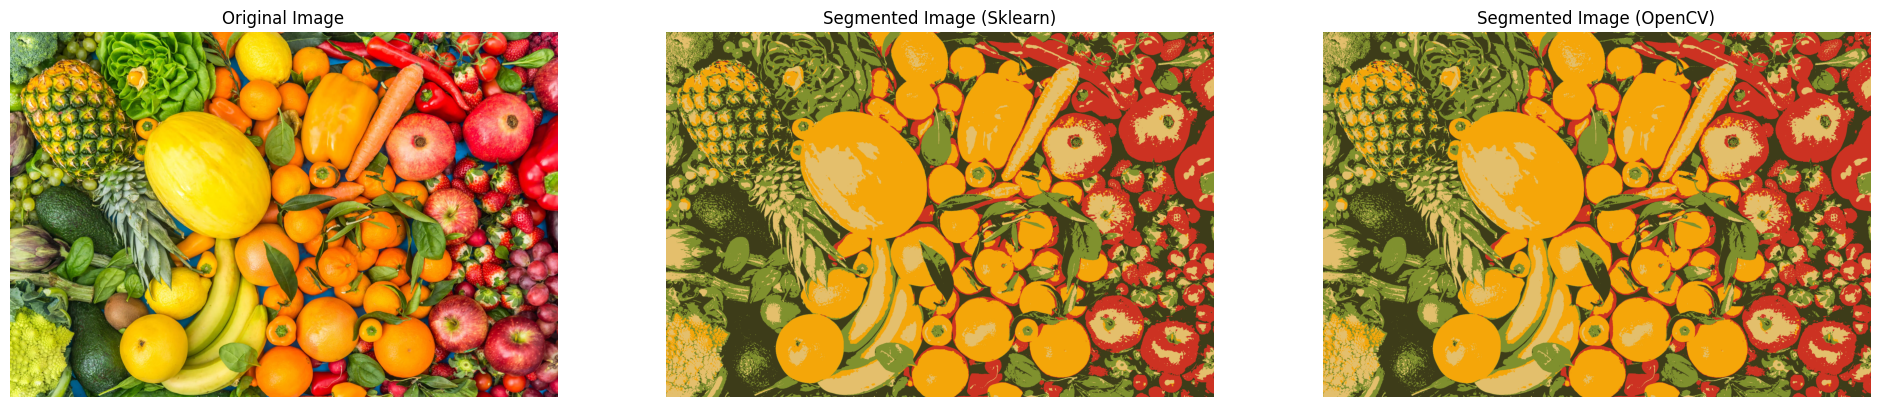

In [11]:
# Ajustar el tamaño de las imágenes para que se vean más grandes
plt.figure(figsize=(24, 8))

# Imagen original
plt.subplot(1, 3, 1)
plt.imshow(image_np)
plt.title('Original Image')
plt.axis('off')

# Imagen segmentada con Sklearn
plt.subplot(1, 3, 2)
plt.imshow(segmented_img)
plt.title('Segmented Image (Sklearn)')
plt.axis('off')

# Imagen segmentada con OpenCV
plt.subplot(1, 3, 3)
plt.imshow(segmented_img_cv)
plt.title('Segmented Image (OpenCV)')
plt.axis('off')

plt.show()